# Convert to reasonable format

In [6]:
import os
def get_file_names(directory):
    file_names = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            file_names.append(filename)
    return file_names

In [7]:
import numpy
import matplotlib.pyplot as plt
import PIL

jungles = [name for name in get_file_names("./image") if name[0] == "j"]
sea = [name for name in get_file_names("./image") if name[0] == "s"]

In [8]:
jungles, len(jungles)

(['j1.jpg',
  'j10.jpg',
  'j11.jpg',
  'j12.jpg',
  'j13.jpg',
  'j14.jpg',
  'j15.jpg',
  'j16.jpg',
  'j17.jpg',
  'j18.jpg',
  'j19.jpg',
  'j2.jpg',
  'j20.jpg',
  'j21.jpg',
  'j22.jpg',
  'j23.jpg',
  'j24.jpg',
  'j25.jpg',
  'j26.jpg',
  'j27.jpg',
  'j28.jpg',
  'j29.jpg',
  'j3.jpg',
  'j30.jpg',
  'j31.jpg',
  'j32.jpg',
  'j33.jpg',
  'j34.jpg',
  'j35.jpg',
  'j36.jpg',
  'j37.jpg',
  'j38.jpg',
  'j39.jpg',
  'j4.jpg',
  'j40.jpg',
  'j44.jpg',
  'j45.jpg',
  'j5.jpg',
  'j6.jpg',
  'j7.jpg',
  'j8.jpg',
  'j9.jpg'],
 42)

In [9]:
sea, len(sea)

(['s1.jpg',
  's10.jpg',
  's11.jpg',
  's12.jpg',
  's13.jpg',
  's14.jpg',
  's15.jpg',
  's16.jpg',
  's17.jpg',
  's18.jpg',
  's19.jpg',
  's2.jpg',
  's20.jpg',
  's21.jpg',
  's22.jpg',
  's23.jpg',
  's24.jpg',
  's25.jpg',
  's26.jpg',
  's27.jpg',
  's28.jpg',
  's29.jpg',
  's3.jpg',
  's30.jpg',
  's31.jpg',
  's32.jpg',
  's33.jpg',
  's34.jpg',
  's35.jpg',
  's36.jpg',
  's37.jpg',
  's38.jpg',
  's39.jpg',
  's4.jpg',
  's40.jpg',
  's5.jpg',
  's6.jpg',
  's7.jpg',
  's8.jpg',
  's9.jpg'],
 40)

In [40]:
train = {"jungles": jungles[:int(len(jungles) * 0.8)], "sea": sea[:int(len(sea) * 0.8)]}
test = {"jungles": jungles[int(len(jungles) * 0.8):], "sea": sea[int(len(jungles) * 0.8):]}

# Classify with mean

In [41]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the image directory paths for sea and jungle images


# Function to calculate average color for an image
def calculate_average_color(image):
    if type(image) == str:
        filename = image
        image = Image.open("./image" + "/" + filename )
    width, height = image.size
    pixel_values = list(image.getdata())
    r_mean = sum(p[0] for p in pixel_values) / (width * height)
    g_mean = sum(p[1] for p in pixel_values) / (width * height)
    b_mean = sum(p[2] for p in pixel_values) / (width * height)
    return (r_mean, g_mean, b_mean)

# Function to load and preprocess images
def load_and_preprocess_images(image_dir, label):
    image_data = []
    labels = []
    
    for filename in image_dir:
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open("./image" + "/" + filename ) # Resize the image to a common size
            
            image_data.append(np.array(img))
            labels.append(label)
    
    return np.array(image_data), np.array(labels)

# Load and preprocess images for sea and jungle
sea_images, sea_labels = load_and_preprocess_images(train["sea"], label='sea')
jungle_images, jungle_labels = load_and_preprocess_images(train["jungles"], label='jungles')

# Calculate average color for each image
sea_avg_colors = np.array([calculate_average_color(Image.fromarray(img)) for img in sea_images])
jungle_avg_colors = np.array([calculate_average_color(Image.fromarray(img)) for img in jungle_images])

# Classify new images based on average color comparison (simple example)
def classify_image(image_avg_color, sea_avg_colors, jungle_avg_colors):
    sea_distances = np.linalg.norm(sea_avg_colors - image_avg_color, axis=1)
    jungle_distances = np.linalg.norm(jungle_avg_colors - image_avg_color, axis=1)
    
    if np.mean(sea_distances) < np.mean(jungle_distances):
        return 0 # sea
    else:
        return 1 # jungle

# sea = 0, jungle = 1
predictions = {}
truth = {}
for labels in test.values():
    for image in labels:
        new_image_avg_color = calculate_average_color(image)
        classification_result = classify_image(new_image_avg_color, sea_avg_colors, jungle_avg_colors)
        predictions[image] = classification_result # truth, predicted 
        truth[image] = 0 if image[0] == "s" else 1

predictions, truth

C:\Users\11\AppData\Local\Temp\ipykernel_20880\971167349.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(image_data), np.array(labels)


({'j4.jpg': 1,
  'j40.jpg': 1,
  'j44.jpg': 0,
  'j45.jpg': 0,
  'j5.jpg': 1,
  'j6.jpg': 1,
  'j7.jpg': 1,
  'j8.jpg': 1,
  'j9.jpg': 1,
  's4.jpg': 0,
  's40.jpg': 0,
  's5.jpg': 0,
  's6.jpg': 0,
  's7.jpg': 1,
  's8.jpg': 0,
  's9.jpg': 0},
 {'j4.jpg': 1,
  'j40.jpg': 1,
  'j44.jpg': 1,
  'j45.jpg': 1,
  'j5.jpg': 1,
  'j6.jpg': 1,
  'j7.jpg': 1,
  'j8.jpg': 1,
  'j9.jpg': 1,
  's4.jpg': 0,
  's40.jpg': 0,
  's5.jpg': 0,
  's6.jpg': 0,
  's7.jpg': 0,
  's8.jpg': 0,
  's9.jpg': 0})

In [42]:
list(truth.values())


[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


# Compute confusion matrix
conf_matrix = confusion_matrix(list(truth.values()), list(predictions.values()))

# Calculate accuracy
accuracy = accuracy_score(list(truth.values()), list(predictions.values()))

# Calculate recall
recall = recall_score(list(truth.values()), list(predictions.values()), average='binary')  # For binary classification

# Calculate precision
precision = precision_score(list(truth.values()), list(predictions.values()), average='binary')  # For binary classification


print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8125
Recall: 0.7777777777777778
Precision: 0.875


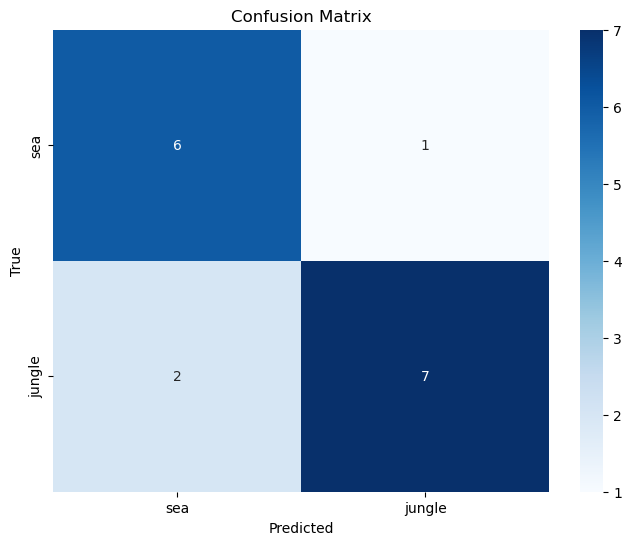

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['sea', 'jungle']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

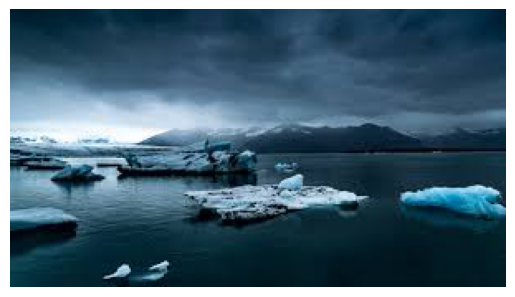

In [39]:
# predicted jungle but it's sea
image = Image.open("./image" + "/" + 's7.jpg' )
plt.imshow(image)
plt.axis('off')
plt.show()